# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [3]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
idx = pd.date_range('1/1/2017', '3/31/2018', freq='D')

In [4]:
# store the parameters
mu, y, std, phi = 5, 8, 2, .7

In [5]:
# generate the time series according to the formula
Y=[]
y=8
np.random.seed(11225)
errors = np.random.normal(loc=0, scale=std, size=len(idx))
error = 0

for i in range(len(idx)):
    Y.append(mu + phi * y + errors[i])
    y = Y[i] - mu
Y

ts = pd.DataFrame(data=Y, index=idx, columns=['ts'])
ts.head(15)

,ts
2017-01-01,13.008794
2017-01-02,8.290869
2017-01-03,8.544932
2017-01-04,3.538470
2017-01-05,7.004262
2017-01-06,6.067940
2017-01-07,7.276515
2017-01-08,2.770043
2017-01-09,3.291103
2017-01-10,9.149709


Plot the time series and verify what you see

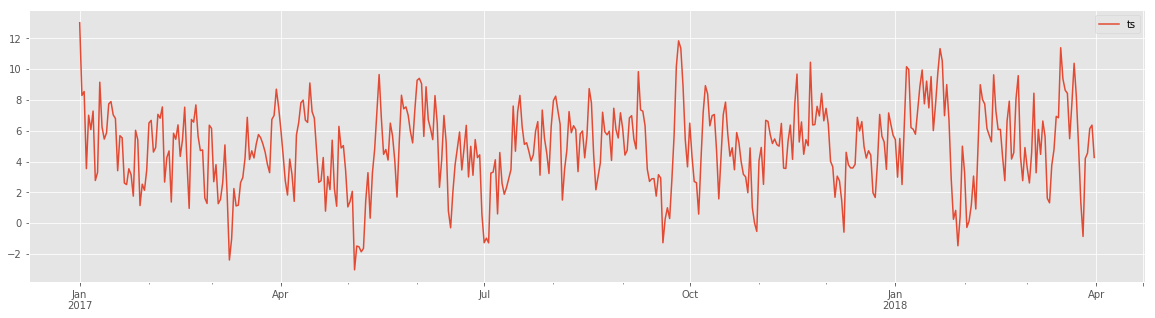

In [6]:
ts.plot(figsize = (20, 5))

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

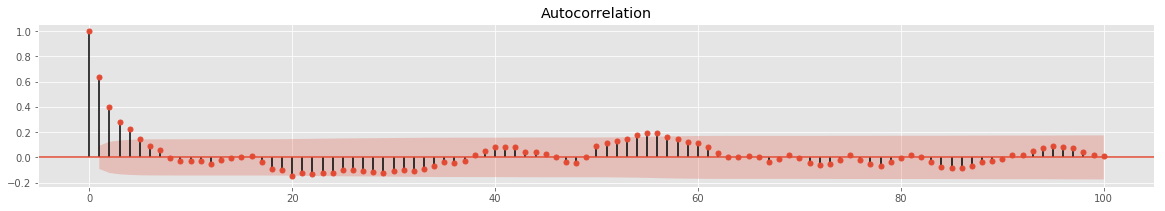

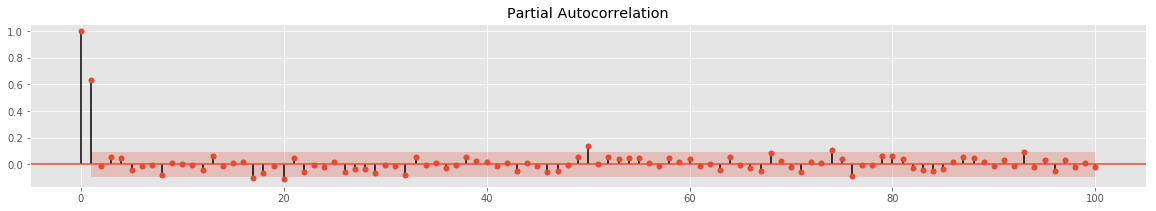

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 3
plot_acf(ts, lags=100);
plot_pacf(ts, lags=100);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [8]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                     ts   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -968.698
Method:                       css-mle   S.D. of innovations              2.033
Date:                Sun, 07 Apr 2019   AIC                           1943.395
Time:                        08:24:42   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.269     18.444      0.000       4.439       5.494
ar.L1.ts       0.6474      0.036     17.880      0.000       0.576       0.718
                                    Roots           

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [9]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
idx = pd.date_range('4/1/2015', '8/31/2015', freq='D')

# store the parameters
theta, std, mu = .9, 4, 7
errors = np.random.normal(0, std, len(idx)+1)
#generate the time series
Y = []
error = 0
for i in range(len(idx)):
    Y.append(mu + errors[i] + theta * error)
    error=errors[i]
    
ts = pd.DataFrame(Y, index=idx, columns=['ts'])
ts.head(15)

,ts
2015-04-01,8.885741
2015-04-02,3.933264
2015-04-03,8.443315
2015-04-04,10.907138
2015-04-05,2.992098
2015-04-06,7.954532
2015-04-07,13.632140
2015-04-08,7.548424
2015-04-09,4.771301
2015-04-10,-1.914233


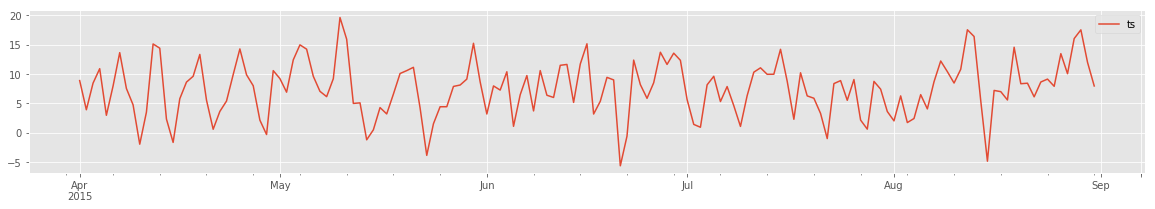

In [10]:
# Plot the time series
ts.plot()

## Look at the ACF and PACF of your model and write down your conclusions

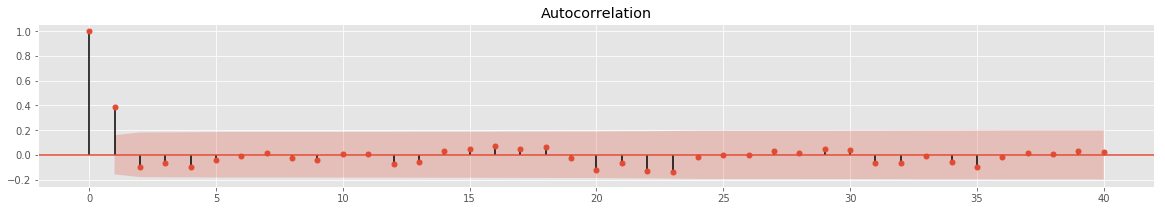

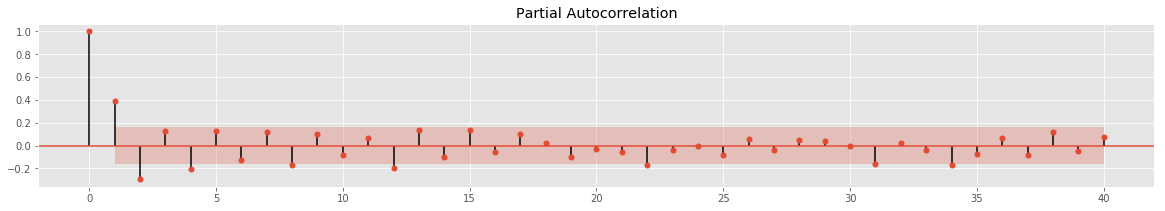

In [11]:
rcParams['figure.figsize']=20, 3
plot_acf(ts, lags=40);
plot_pacf(ts, lags=40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [12]:
# Fit an AR(1) model to the first simulated data
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                     ts   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -425.916
Method:                       css-mle   S.D. of innovations              3.897
Date:                Sun, 07 Apr 2019   AIC                            857.832
Time:                        08:24:42   BIC                            866.924
Sample:                    04-01-2015   HQIC                           861.525
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5167      0.589     12.763      0.000       6.362       8.671
ma.L1.ts       0.8753      0.050     17.634      0.000       0.778       0.973
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [13]:
# the data is in "winning_400m.csv"
wins = pd.read_csv('winning_400m.csv')
wins['year'] = pd.to_datetime(wins.year, format='%Y')
wins.set_index('year', inplace=True)
wins.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot the data

Text(0.5, 1.0, 'Winning Times over Time')

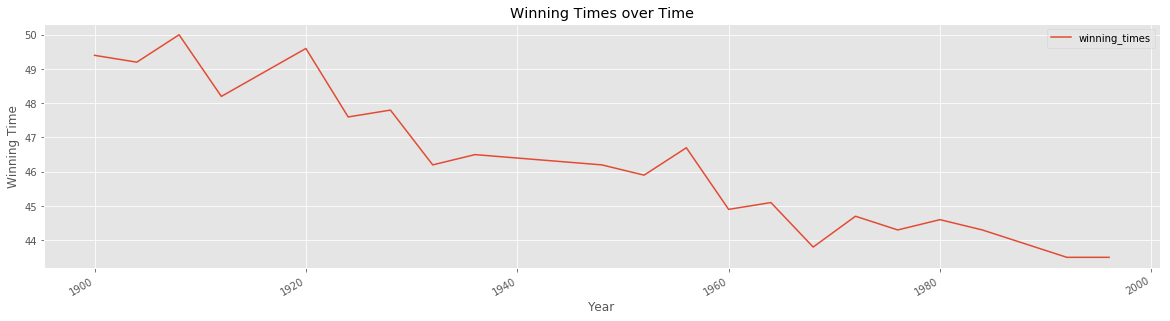

In [14]:
wins.plot(figsize=(20, 5))
plt.ylabel('Winning Time')
plt.xlabel('Year')
plt.title('Winning Times over Time')

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

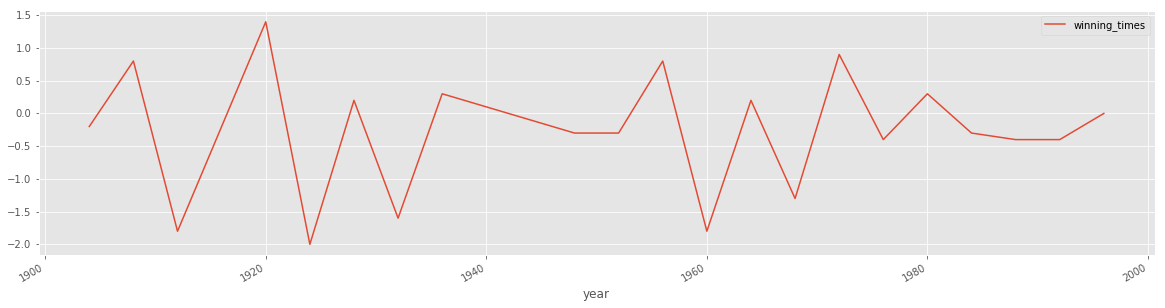

In [15]:
wins_diff = wins.diff().dropna()
wins_diff.plot(figsize=(20, 5))

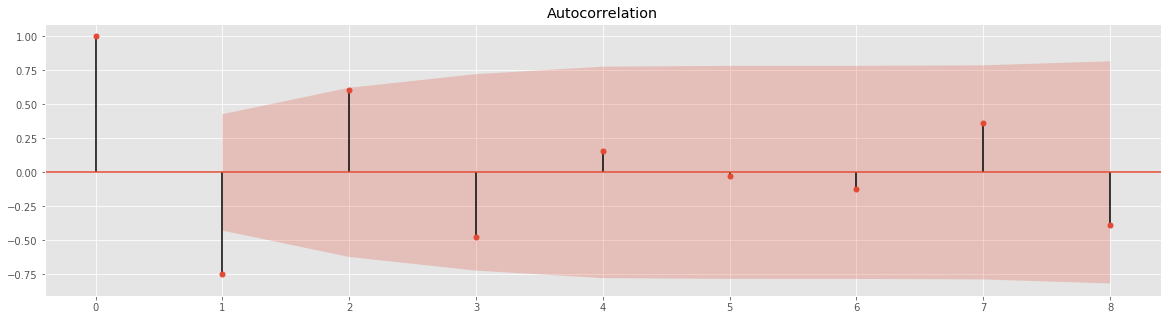

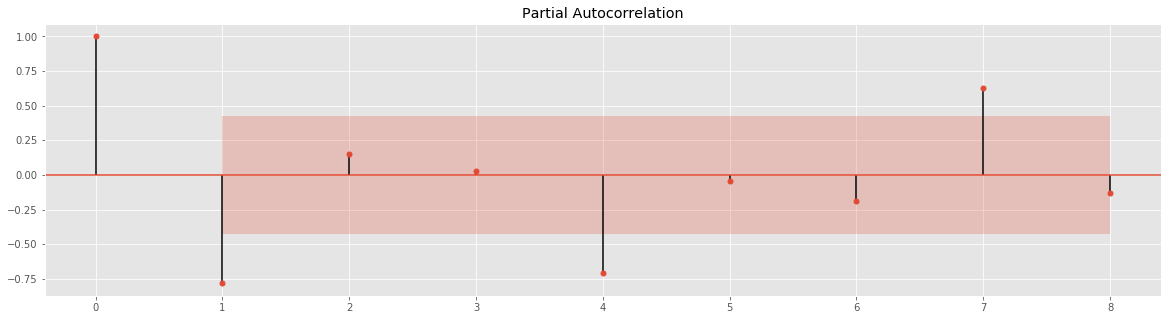

In [16]:
# Look at ACF and PACF
rcParams['figure.figsize'] = '20, 5'
plot_acf(wins_diff, lags=8);
plot_pacf(wins_diff, lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [37]:
# Fit an ARMA model to the first simulated data
import warnings

min_aic_bic = 150
model = (0, 0)
for p in range(1, 6):
    for q in range(1, 6):
        print(f'Trying P: {p} and Q: {q}')
        try:
            warnings.filterwarnings("ignore") 
            mod_arma = ARMA(wins_diff, order=(p,q))
            res_arma = mod_arma.fit()
            aic, bic = res_arma.aic, res_arma.bic
            print(f'AIC: {np.round(aic,2)}; BIC: {np.round(bic,2)}')
            print(f'Max P-Value: {np.round(res_arma.pvalues[1:].max(), 4)}')
            if aic + bic < min_aic_bic and res_arma.pvalues[1:].max() <= .05:
                min_aic_bic = .8 * aic + .2 * bic
                model = (p, q)
        except:
            print(f'Current order ({p}, {q}) does not work.')
            
        print('-----------------------------------')

mod_arma = ARMA(wins_diff, order=model)
res_arma = mod_arma.fit()
        
# Print out summary information on the fit
print(f'\nModel Selected:\nP: {model[0]}; Q: {model[1]}')
print(f'AIC: {np.round(res_arma.aic,2)}; BIC: {np.round(res_arma.bic, 2)}')
print(f'Max P-Value: {np.round(res_arma.pvalues[1:].max(), 6)}')
print(res_arma.summary())

Trying P: 1 and Q: 1
AIC: 47.92; BIC: 52.09
Max P-Value: 0.6495
-----------------------------------
Trying P: 1 and Q: 2
AIC: 48.15; BIC: 53.37
Max P-Value: 0.9553
-----------------------------------
Trying P: 1 and Q: 3
AIC: 44.78; BIC: 51.05
Max P-Value: 0.6931
-----------------------------------
Trying P: 1 and Q: 4
AIC: 46.28; BIC: 53.59
Max P-Value: 1.0
-----------------------------------
Trying P: 1 and Q: 5
Current order (1, 5) does not work.
-----------------------------------
Trying P: 2 and Q: 1
AIC: 47.91; BIC: 53.13
Max P-Value: 0.0
-----------------------------------
Trying P: 2 and Q: 2
AIC: 44.94; BIC: 51.21
Max P-Value: 0.0011
-----------------------------------
Trying P: 2 and Q: 3
AIC: 46.94; BIC: 54.25
Max P-Value: 0.9628
-----------------------------------
Trying P: 2 and Q: 4
AIC: 47.81; BIC: 56.16
Max P-Value: 0.9997
-----------------------------------
Trying P: 2 and Q: 5
Current order (2, 5) does not work.
-----------------------------------
Trying P: 3 and Q: 1

## What is your final model? Why did you pick this model?

Final model is AMRA(2, 1). Looking at AIC and BIC, I didn't think model complexity would be a big issue, but didn't wanted to eliminate it altogether. So, I gave AIC an 80% weighting and BIC a 20% weighting, and looked for the model with the lowest combined value, with the condition that no p-values exceed 5%. After trying all p, q values between 1 and 5, the (2, 1) model provided the best results with the given parameters.

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.